In [140]:
from SimPEG import *

In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [142]:
mesh = Utils.meshutils.readUBCTensorMesh('../../examples/mesh.msh')
sigma3D = Utils.meshutils.readUBCTensorModel('../../examples/sigma_realistic.con', mesh3D)

In [143]:
def viz3D(mesh, sigma):
    fig, ax = plt.subplots(1,2, figsize = (12, 5))
    vmin = np.log10(Utils.mkvc(sigma).min())
    vmax = np.log10(Utils.mkvc(sigma).max())
    indy = 21
    indz = 21
    dat = mesh.plotSlice(np.log10(sigma), ind = indz, normal='Z', ax = ax[0], clim=(-3, -0.5), grid=True, gridOpts={'alpha':0.2})
    dat = mesh.plotSlice(np.log10(sigma), ind = indy, normal='Y', ax = ax[1], clim=(-3, -0.5), grid=True, gridOpts={'alpha':0.2})
    for i in range(2):
        if i==0:
            ax[i].set_xlabel('Easting (m)', fontsize = 16)
            ax[i].set_ylabel('Northing (m)', fontsize = 16)        
            ax[i].set_ylim(-150., 150.)
            ax[i].set_xlim(-300., 300.)        
            ax[i].set_title(('Depth at %5.2f m')%(mesh.vectorCCz[indz]), fontsize = 16)
        elif i==1:
            ax[i].set_xlabel('Easting (m)', fontsize = 16)
            ax[i].set_ylabel('Depth (m)', fontsize = 16)                
            ax[i].set_ylim(-600., -10.)
            ax[i].set_xlim(-300., 300.)        
            ax[i].set_title(('Northing at %5.2f m')%(mesh.vectorCCy[indy]), fontsize = 16)
        cb = plt.colorbar(dat[0], ax=ax[i], orientation = 'horizontal', ticks = [np.arange(6)*0.5-3])
        cb.set_label('Log10 conductivity (S/m)', fontsize = 14)

In [144]:
print mesh3D

  ---- 3-D TensorMesh ----  
   x0: -4198.57
   y0: -4098.57
   z0: -4198.57
  nCx: 54
  nCy: 44
  nCz: 54
   hx: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 30*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88
   hy: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 20*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88
   hz: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 30*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88


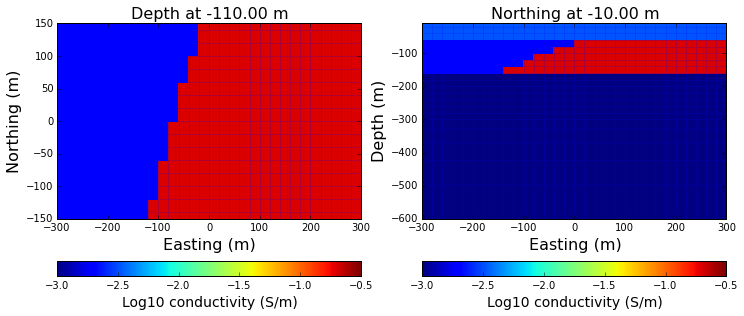

In [145]:
viz3D(mesh, sigma3D)

In [146]:
SIGMA = sigma3D.reshape(mesh3D.vnC, order='F')

In [204]:
ind1z = (mesh3D.vectorCCz >-60) & (mesh3D.vectorCCz <0.)
ind2z = (mesh3D.vectorCCz >-160) & (mesh3D.vectorCCz <-60)
indy = (mesh3D.vectorCCy >-400) & (mesh3D.vectorCCy <400)
actind = np.logical_and((mesh3D.gridCC[:,2] >-160) & (mesh3D.gridCC[:,2] <-60), 
                       (mesh3D.gridCC[:,1] >-400) & (mesh3D.gridCC[:,1] <400))

(0.0001, 1)

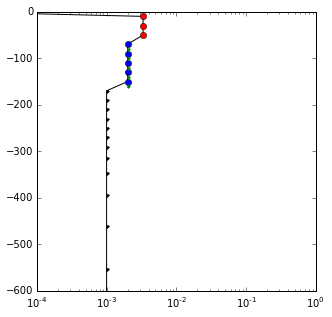

In [205]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.semilogx(SIGMA[0,0,:].flatten(), mesh3D.vectorCCz, 'k.-')
ax.semilogx(SIGMA[0,0,ind1z].flatten(), mesh3D.vectorCCz[ind1z], 'ro')
ax.semilogx(SIGMA[0,0,ind2z].flatten(), mesh3D.vectorCCz[ind2z], 'bo')
ax.semilogx(np.ones_like(mesh3D.vectorNz[ind2z])*2e-3, mesh3D.vectorNz[ind2z], 'g.')
# ax.invert_yaxis()
ax.set_ylim(-600., -0.5)
ax.set_xlim(1e-4, 1)

In [208]:
sigma3Dact = sigma3D[actind]

In [207]:
meshact = Mesh.TensorMesh([mesh.hx, mesh.hy[indy], mesh.hz[ind2z]], x0 = np.r_[mesh.x0[0],mesh3D.vectorNy[indy][0], mesh3D.vectorNz[ind2z][0]])

In [209]:
from ipywidgets import interact, IntSlider

In [214]:
def dum(ind):
    fig = plt.figure(figsize = (7,3.5))
    ax = plt.subplot(111)
    meshact.plotSlice(np.log10(sigma3Dact),ind=ind,ax=ax, grid=True, gridOpts={'alpha':0.1, 'color':'k'})
    ylim(-400., 400.)
    xlim(-950., 950.)        
    plt.show()

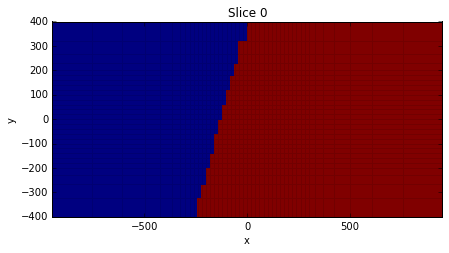

None

<function __main__.dum>

In [215]:
interact(dum, ind = IntSlider(min=0, max=4, step=1, value=0))

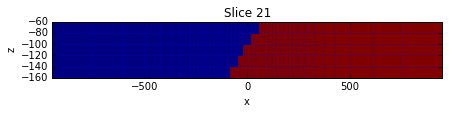

In [236]:
fig = plt.figure(figsize = (7,1.))
ax = plt.subplot(111)
meshact.plotSlice(np.log10(sigma3Dact),ind=21, normal='Y', ax=ax, grid=True, gridOpts={'alpha':0.2})
# meshact.plotSlice(seaind,ind=21, normal='Y', ax=ax, grid=True, gridOpts={'alpha':0.2})
ax.set_ylim(-160., -60.)
ax.set_xlim(-950., 950.)        
plt.show()


In [216]:
SIGMA3DACT = sigma3Dact.reshape((meshact.vnC[0],prod(meshact.vnC[1:])), order='F')
XACT = meshact.gridCC[:,0].reshape((meshact.vnC[0],prod(meshact.vnC[1:])), order='F')
seaind = sigma3Dact==sigma3Dact.max()
SEAIND = seaind.reshape((meshact.vnC[0],prod(meshact.vnC[1:])), order='F')

In [249]:
yzX = np.zeros(prod(meshact.vnC[1:]))
for i in range(prod(meshact.vnC[1:])):
    yzX[i] = XACT[SEAIND[:,i],i].min()

In [250]:
YZX = yzX.reshape((meshact.vnC[1:]), order='F')
YZ = Utils.ndgrid(meshact.vectorCCy, meshact.vectorCCz)

In [253]:
from numpy.polynomial import polynomial

In [276]:
V = polynomial.polyvander2d(YZ[:,0], YZ[:,1], [3, 1])

In [277]:
H = np.dot(V.T, V)
g = np.dot(V.T, yzX)
mest = np.linalg.solve(H, g)

In [278]:
out = V.dot(mest)
OUT = out.reshape((meshact.vnC[1:]), order='F')

(-400.0, 400.0, -150.0, -60.0)

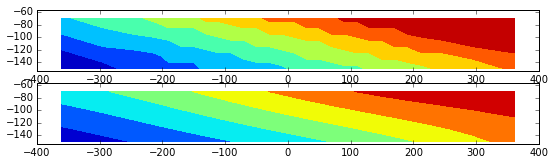

In [279]:
fig = plt.figure(figsize = (9,2.4))
ax = plt.subplot(211)
ax.contourf(YZ[:,0].reshape((meshact.vnC[1:]), order='F'), YZ[:,1].reshape((meshact.vnC[1:]), order='F'), YZX)
ax.axis('equal')
ax1 = plt.subplot(212)
ax1.contourf(YZ[:,0].reshape((meshact.vnC[1:]), order='F'), YZ[:,1].reshape((meshact.vnC[1:]), order='F'), OUT)
ax1.axis('equal')

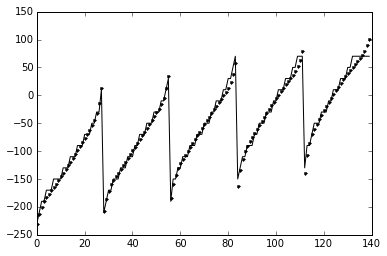

In [275]:
plot(yzX, 'k')
plot(out, 'k.')

In [266]:
mest.shape

(12,)